# EDA, analyse et nettoyage des données

## Nettoyage et exploration des données

Import des différentes librairies

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer

from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Récupération de la base de données sous forme de dataframe :

In [3]:
immoSV_df = pd.read_csv(r'C:\Users\Admin\Documents\marianneSimplon\simplon\immo_SiliconValley_marianneD\data\traindata_ori.csv',delimiter=',', decimal='.')
immoSV_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

### Exploration globale des données du dataframe

In [66]:
immoSV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [67]:
immoSV_df.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
mean   10295.498789   -119.564046     35.626523           28.624516   
std     5941.973488      2.005033      2.139150           12.597980   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5178.750000   -121.790000     33.930000           18.000000   
50%    10263.500000   -118.490000     34.250000           29.000000   
75%    15438.250000   -118.010000     37.710000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16512.000000    16336.000000  16512.000000  16512.000000   
mean    2644.170603      539.319540   1435.017260    501.135962   
std     2213.946369      425.207704   1158.151967    385.650673   
min        6.000000        2.000000      3.000000      2.000000   
25%     1446.000000      296.000000    788.000000    280.000000   
50%     2116.000000      435.000000   1168.000000    410.000000   
75%     3154.000000      647.000000   1738.000000    606.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   16512.000000        16512.000000  
mean        3.864091       206509.251453  
std         1.893244       115225.957661  
min         0.499900        14999.000000  
25%         2.562500       119400.000000  
50%         3.531300       179300.000000  
75%         4.733225       264500.000000  
max        15.000100       500001.000000

Unnamed: 0 semble être l'index du fichier d'origine : il n'apporte pas d'information je le supprime de ma base de données

In [4]:
# Supression de la colonne Unnamed: 0
immoSV_df = immoSV_df.drop("Unnamed: 0", axis=1)

### Doublons dans le dataframe ?

In [79]:
immoSV_df.duplicated().value_counts()

False    16512
dtype: int64

Il n'y a pas de doublons dans le jeu de données.

### Observation de la répartition des données (et des outliers)

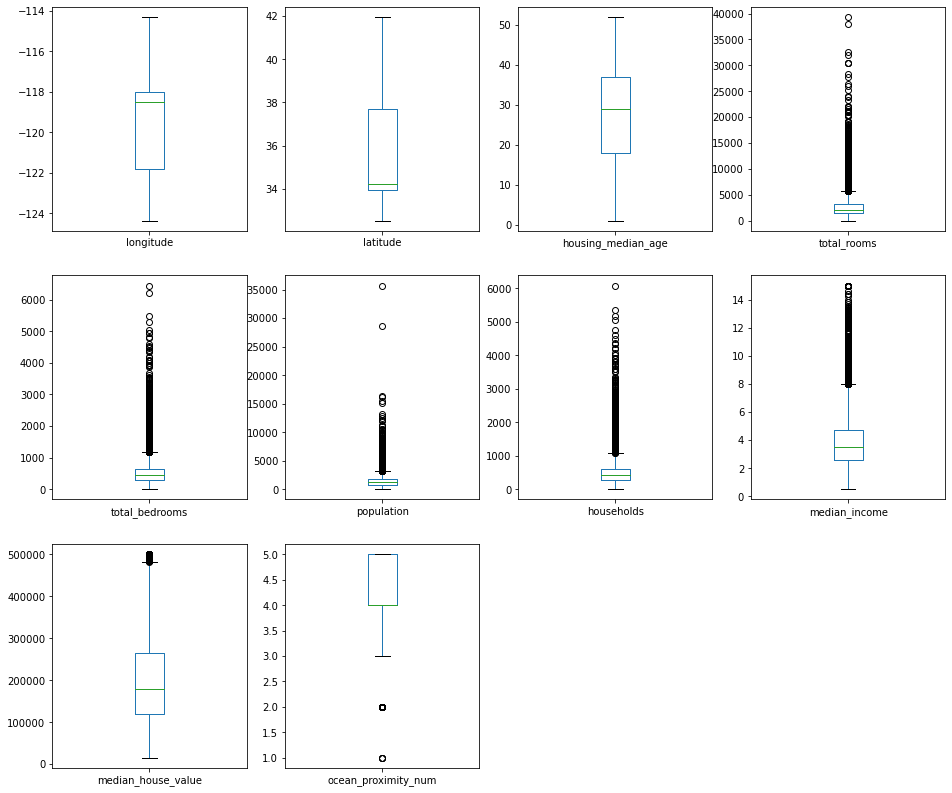

In [104]:
immoSV_df.plot(kind='box', subplots=True, layout=(3, 4), figsize = (16, 14));

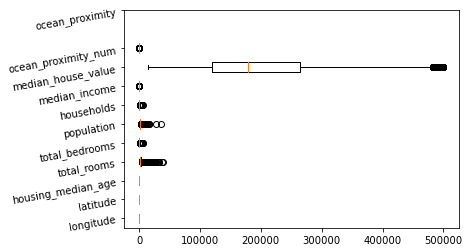

In [105]:
fig, ax = plt.subplots()
ax.boxplot(immoSV_df.drop('ocean_proximity', axis=1), vert=0)
plt.yticks([1,2,3,4,5,6,7,8,9,12,10], immoSV_df_net.columns,  rotation = 10)
plt.show()

Sur ces boxplots, on voit qu'il y a beaucoup d'outliers, particulièrement pour total_rooms, total_bedrooms, population, housholds & median_income. <br>
On voit aussi que les échelles sont très différentes, il faudra standardiser les données.

Pour identifier les observations qui sont les outliers (les points noirs des boxplots) :

In [5]:
def findOutliers(column_name):
    df_outl = immoSV_df.sort_values(by=[f'{column_name}'])
    df_outl_q1, df_outl_q3 = np.percentile(df_outl[f'{column_name}'],[25,75])
    df_outl_iqr = df_outl_q3 - df_outl_q1
    df_outl_lower_bound = df_outl_q1 -(1.5 * df_outl_iqr)
    df_outl_upper_bound = df_outl_q3 +(1.5 * df_outl_iqr)
    df_outl = df_outl[(df_outl[f'{column_name}'] <= df_outl_lower_bound) | (df_outl[f'{column_name}'] >= df_outl_upper_bound)]
    return df_outl

In [6]:
total_rooms_outl = findOutliers('total_rooms')
total_bedrooms_outl = findOutliers('total_bedrooms')
total_population_outl = findOutliers('population')
total_households_outl = findOutliers('households')
total_median_income_outl = findOutliers('median_income')
total_median_house_value_outl = findOutliers('median_house_value')

**Il y a beaucoup d'outliers..........................................................**

### Observation de la localisation des districts

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


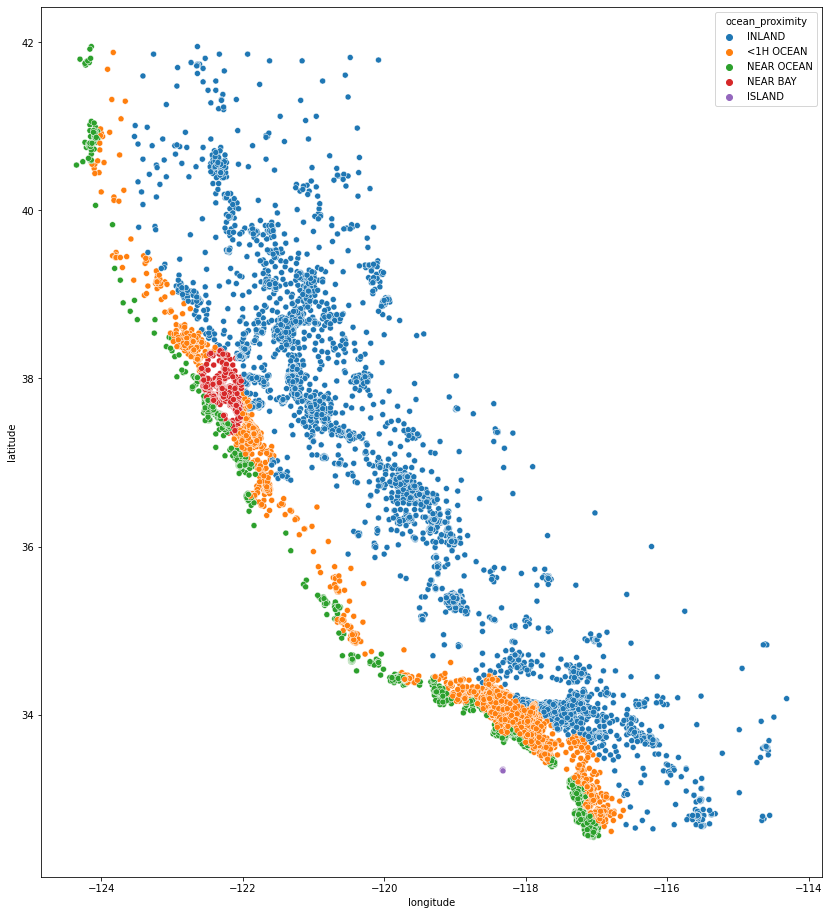

In [101]:
plt.subplots(figsize=(14,16))
sns.scatterplot(immoSV_df['longitude'], immoSV_df['latitude'], hue=immoSV_df['ocean_proximity'])
plt.show()

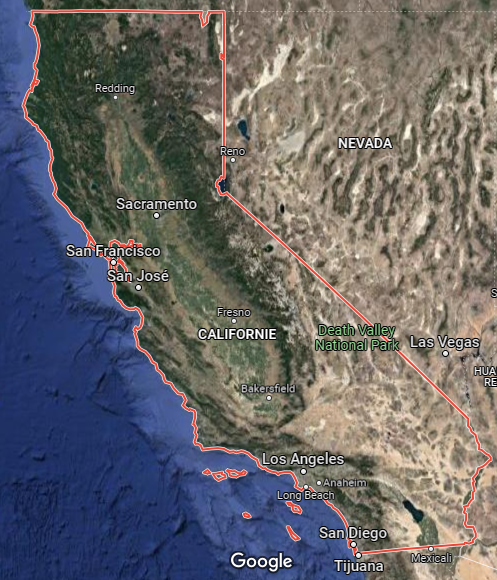

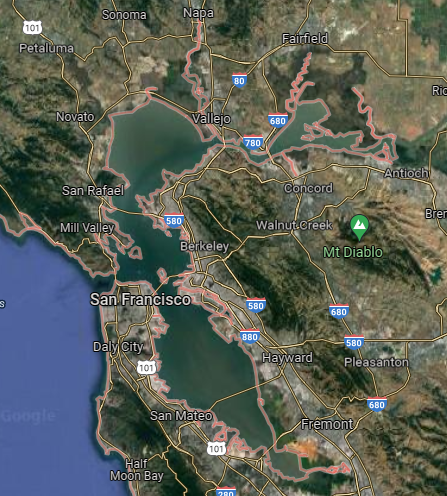

In [103]:
immoSV_df['ocean_proximity_num'].value_counts()

4.0    7312
5.0    5235
2.0    2140
3.0    1821
1.0       4
Name: ocean_proximity_num, dtype: int64

### Exploration globale des données

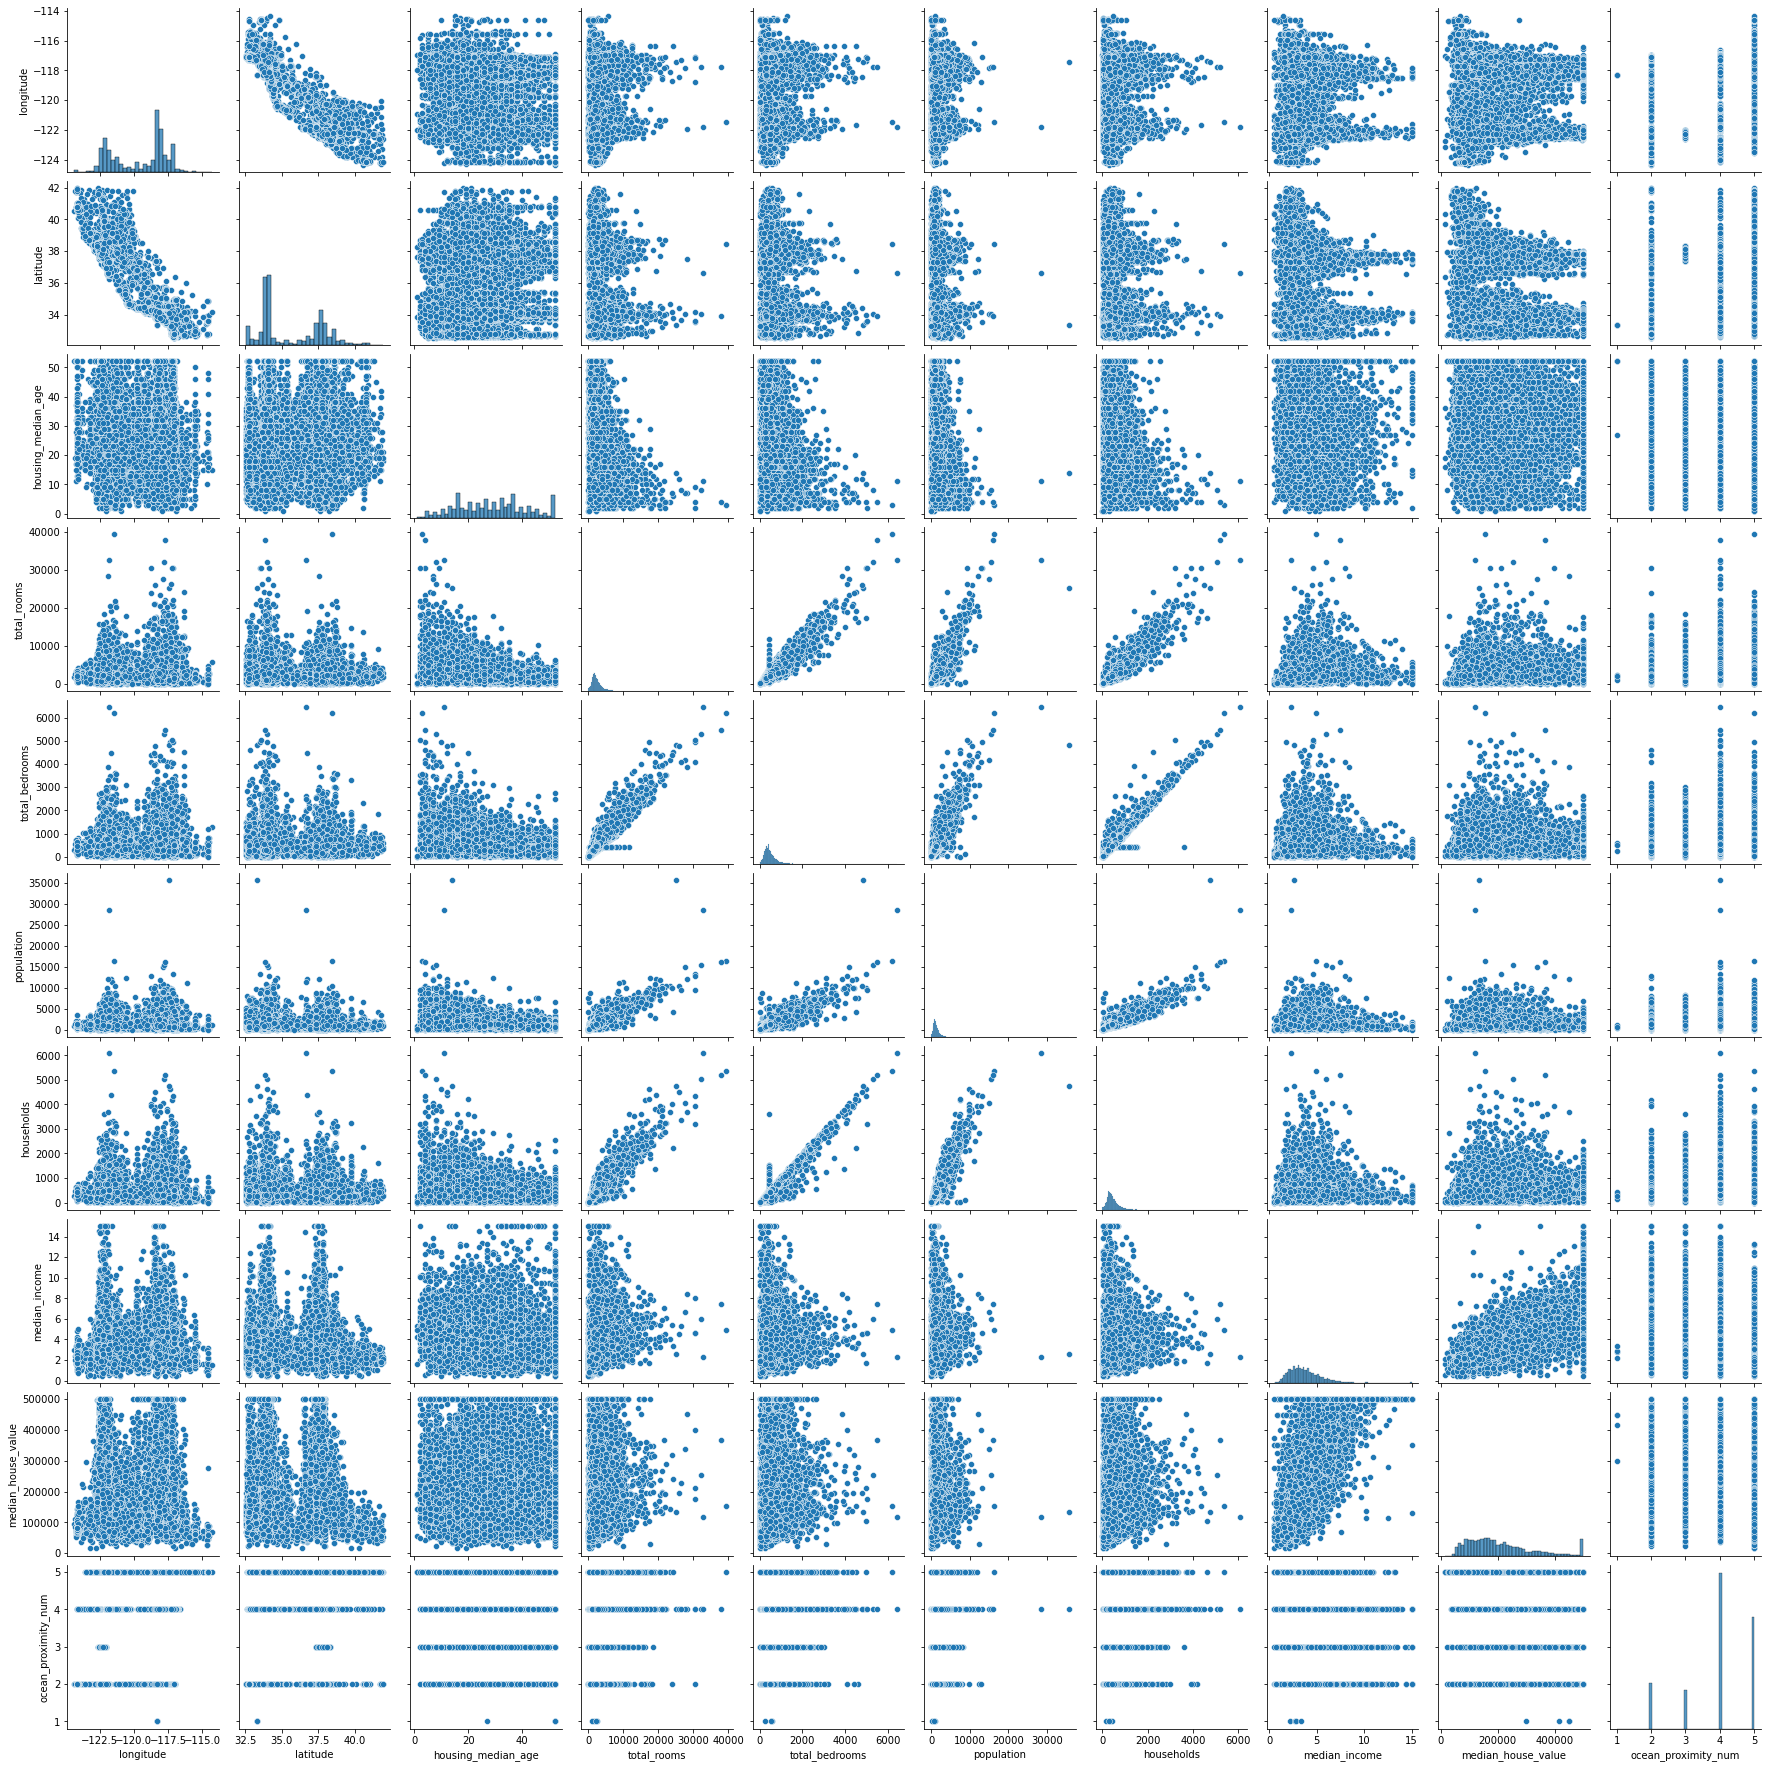

In [106]:
sns.pairplot(data=immoSV_df)

**Latitude & Longitude :**
<br>
On observe pour ces deux variables des densités d'observations plus importantes en 2 points (on voit comme une double gaussienne).
<br>
Sur le graphe de la latitude en fonction de la longitude on observe la forme de la Californie, avec les densités d'observations : peu dans le désert, plus forte le long de l'océan et au nord. Est-ce que les 2 distributions observées correspondent aux 2 grandes villes de la Californie : San Francisco et Los Angeles.
<br>
**Housing_median_age :**
<br>
Sur les graphes avec households, populatio, total_bedrooms & total_rooms, on observe une relation particulière où les obervations sont distribuées en dessous d'une courbe décroissante
<br>
**Total_rooms et Total_bedrooms**
<br>
Il semble y avoir une corrélation positive entre total_rooms & total_bedrooms, total_rooms & households et total_bedrooms & households, total_rooms & population et total_bedrooms & population.
<br>
**Population**
<br>
Il semble y avoir une corrélation positive entre total_rooms & population, total_bedrooms & population, households & population.
<br>
**Households**
<br>
Il semble y avoir une corrélation positive entre total_rooms & households et total_bedrooms & households et population & households.
Avec total_bedrooms, il y a un petit ensemble de donénes qui ne semble légèrement pas suivre cette corrélation (visibles en forme de lignes).
<br>
**Median_income**
<br>
Peut-être une corrélation positive entre median_income & median_house_value.
<br>
**Median_house_value**
<br>
Une bizarerie, il y a énormément de données pour une valeur de 500 000 environ ! Peut-être qu'à partir d'un certaine valeur on a une catégorie "supérieure à"<br>
Vue la répartition des observations avec  house_age il semble n'y avoir aucune relation entre ces 2 variables.
<br>
**Ocean_proximity_num**
<br>
On ne voit pas grand chose, même pas avec la longitude. Il serait plus intéressant d'analyser les densités de points plutôt ?

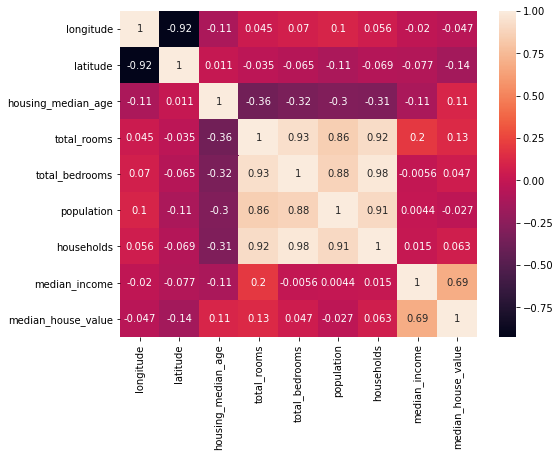

In [18]:
corr_immoSV_df = immoSV_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_immoSV_df, annot=True)
plt.show()

**Latitude & Longitude :**
<br>
Il y a une corrélation négative très forte entre latitude et longitude (-0.92).
<br>
**Total_rooms, Total_bedrooms, Population, Households**
<br>
Il y a de fortes corrélations positives entre les variables : total_rooms & total_bedrooms (0.93), total_rooms & population (0.86), total_rooms & households (0.92), total_bedrooms & population (0.88), total_bedrooms & households (0.98), population & households (0.91).
<br>
**Median_income et Median_house_value**
<br>
Il y a une corrélation positive moyenne entre median_income et median_house_value (0.69).

### Split du dataset en un dataset train et un dataset test

In [7]:
immoSV_train, immoSV_test = train_test_split(immoSV_df, test_size=0.3)

In [126]:
#Définition d'une fonction d'enregistrement des bases de données train et test
def registerData(df,type,numberIteration):
    outname = f'{numberIteration}_immoSV_{type}.csv'
    outdir = f'.\data\{numberIteration}it'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    fullname = os.path.join(outdir, outname)    
    df.to_csv(fullname, index=False)
    print(fullname)

In [49]:
registerData(immoSV_train,'train',0)
registerData(immoSV_test,'test',0)

.\data\0it\0_immoSV_train.csv
.\data\0it\0_immoSV_test.csv


## 1ère itération : données manquantes - suppression

In [9]:
immoSV_train['total_bedrooms'].isna().value_counts()

False    11441
True       117
Name: total_bedrooms, dtype: int64

In [10]:
immoSV_train.dropna(axis=0, inplace=True)
immoSV_train['total_bedrooms'].isna().value_counts()

<ipython-input-10-70f2de0e62f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immoSV_train.dropna(axis=0, inplace=True)


False    11441
Name: total_bedrooms, dtype: int64

In [11]:
immoSV_test['total_bedrooms'].isna().value_counts()

False    4895
True       59
Name: total_bedrooms, dtype: int64

In [12]:
immoSV_test.dropna(axis=0, inplace=True)
immoSV_test['total_bedrooms'].isna().value_counts()

<ipython-input-12-e8a8dee06d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immoSV_test.dropna(axis=0, inplace=True)


False    4895
Name: total_bedrooms, dtype: int64

In [94]:
registerData(immoSV_train,'train',1)
registerData(immoSV_test,'test',1)

.\data\1it\1_immoSV_train.csv
.\data\1it\1_immoSV_test.csv


## 2e itération : données manquantes - remplissage par médiane

### Données manquantes dans la feature total_bedrooms

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bedrooms', ylabel='count'>

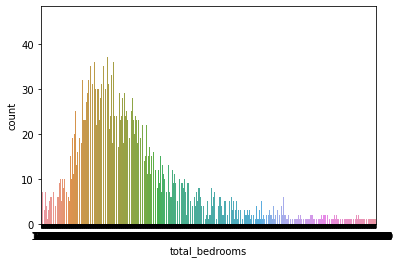

In [69]:
sns.countplot(immoSV_df['total_bedrooms'])

In [70]:
immoSV_df['total_bedrooms'].value_counts()

280.0     46
315.0     41
291.0     41
348.0     40
287.0     40
          ..
1550.0     1
1797.0     1
1743.0     1
1090.0     1
2479.0     1
Name: total_bedrooms, Length: 1828, dtype: int64

Le but ci-dessus est de déterminer si je vais utiliser la moyenne ou la médiane pour compléter les données manaquantes. La distribution n'est pas tout a fait gaussienne et il y a des données extrèmes en faible nombre : je choisis la médiane

In [13]:
immoSV_train, immoSV_test = train_test_split(immoSV_df, test_size=0.3)

In [14]:
# Remplissage des données manquantes par la médiane
immoSV_test['total_bedrooms'].fillna(immoSV_test['total_bedrooms'].median(),inplace=True)
immoSV_train['total_bedrooms'].fillna(immoSV_train['total_bedrooms'].median(),inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [110]:
registerData(immoSV_train,'train',2)
registerData(immoSV_test,'test',2)

.\data\2it\2_immoSV_train.csv
.\data\2it\2_immoSV_test.csv


## 3e itération : données manquantes - remplissage par KNN

In [21]:
immoSV_train, immoSV_test = train_test_split(immoSV_df, test_size=0.3)

In [266]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_log_error

In [267]:
# distortions = []
# K = range(1,10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(clustering_df)
#     distortions.append(kmeanModel.inertia_)
    
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [268]:
# score = []
# K = range(1,10)
# for k in range K:
#     KNNImputer(n_neighbors=k)
    
#     score.append()
    

In [269]:
# error_rate = []

# for i in range(1,50):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     pred = knn.predict(X_test)
#     error_rate.append(np.mean(pred != y_test))

# plt.figure(figsize=(15,10))
# plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [22]:
X_train = immoSV_train.drop(['median_house_value','ocean_proximity'],axis=1)

In [23]:
imputer = KNNImputer(n_neighbors= int(round(np.sqrt(len(immoSV_train.index)))))
ft_imputer = imputer.fit(X_train)
immoSV_train_knn = pd.DataFrame(ft_imputer.transform(X_train),columns = X_train.columns)
# immoSV_train_knn = pd.DataFrame(imputer.fit_transform(X_train),columns = X.columns)

In [24]:
immoSV_train_knn.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

In [25]:
total_bedrooms_train = pd.DataFrame(immoSV_train_knn['total_bedrooms'])

In [26]:
immoSV_train = immoSV_train.drop('total_bedrooms', axis=1)
immoSV_train = immoSV_train.merge(total_bedrooms_train,how='inner', on=immoSV_train.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)

In [304]:
immoSV_train.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
total_bedrooms        False
dtype: bool

In [27]:
X_test = immoSV_test.drop(['median_house_value','ocean_proximity'],axis=1)

In [28]:
# imputer = KNNImputer(n_neighbors= int(round(np.sqrt(len(immoSV_test.index)))))
immoSV_test_knn = pd.DataFrame(ft_imputer.transform(X_test),columns = X_test.columns)
# immoSV_test_knn = pd.DataFrame(imputer.fit_transform(X_test),columns = X.columns) #si on transform sans fit on a erreur suivante : This KNNImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator

In [307]:
immoSV_test_knn.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

In [29]:
total_bedrooms_test = pd.DataFrame(immoSV_test_knn['total_bedrooms'])
immoSV_test = immoSV_test.drop('total_bedrooms', axis=1)
immoSV_test = immoSV_test.merge(total_bedrooms_test,how='inner', on=immoSV_test.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [309]:
immoSV_test.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
total_bedrooms        False
dtype: bool

In [310]:
registerData(immoSV_train,'train',3)
registerData(immoSV_test,'test',3)

.\data\3it\3_immoSV_train.csv
.\data\3it\3_immoSV_test.csv


## 4e itération : scaling par normalisation

In [30]:
immoSV_train = pd.read_csv(r'.\data\3it\3_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\3it\3_immoSV_test.csv',delimiter=',', decimal='.')

In [31]:
immoSV_train_part = immoSV_train[["median_house_value","ocean_proximity"]]
immoSV_test_part = immoSV_test[["median_house_value","ocean_proximity"]]

In [32]:
ss_X_train = immoSV_train.drop(["median_house_value","ocean_proximity"], axis=1)
ss_X_test = immoSV_test.drop(["median_house_value","ocean_proximity"], axis=1)

In [33]:
for c in range (0,8):
    print(f'{c} : {shapiro(immoSV_train.iloc[:, c])}')

0 : ShapiroResult(statistic=0.8957303166389465, pvalue=0.0)
1 : ShapiroResult(statistic=0.8786205649375916, pvalue=0.0)
2 : ShapiroResult(statistic=0.9782475233078003, pvalue=1.6363096692573464e-38)
3 : ShapiroResult(statistic=0.6943032741546631, pvalue=0.0)
4 : ShapiroResult(statistic=0.6844956874847412, pvalue=0.0)
5 : ShapiroResult(statistic=0.7409316301345825, pvalue=0.0)
6 : ShapiroResult(statistic=0.8920114636421204, pvalue=0.0)
7 : ShapiroResult(statistic=0.9120966196060181, pvalue=0.0)


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Toutes les p-values de toutes les colonnes sont inférieures à 0.05. On rejete toutes les hypothèses nulles, soit les donénes suivent une loi normale. Je vais normaliser les données au lieu de les standardiser. <br>
Deux questions : des p-values à 0.0 ????! et s'il y a une variable qui est divisée en 2 groupes qui suivent une loi normale ???

##### Normalisation des données

In [34]:
sc = MinMaxScaler()
ft_sc = sc.fit(ss_X_train)
immoSV_train = ft_sc.transform(ss_X_train)

In [35]:
immoSV_train = pd.DataFrame(immoSV_train, columns=ss_X_train.columns)

In [36]:
immoSV_test = ft_sc.transform(ss_X_test)

In [37]:
immoSV_test = pd.DataFrame(immoSV_test, columns=ss_X_test.columns)

In [38]:
immoSV_train = immoSV_train.merge(immoSV_train_part,how='inner', on=immoSV_train.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)
immoSV_test = immoSV_test.merge(immoSV_test_part,how='inner', on=immoSV_test.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [347]:
registerData(immoSV_train,'train',4)
registerData(immoSV_test,'test',4)

.\data\4it\4_immoSV_train.csv
.\data\4it\4_immoSV_test.csv


## 5e itération : encoding par OneHotEncoder

In [39]:
immoSV_train = pd.read_csv(r'.\data\4it\4_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\4it\4_immoSV_test.csv',delimiter=',', decimal='.')

In [40]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit(immoSV_train[['ocean_proximity']])
enc_df = pd.DataFrame(enc.transform(immoSV_train[['ocean_proximity']]).toarray())
# enc_df = pd.DataFrame(enc.fit_transform(immoSV_train[['ocean_proximity']]).toarray())

# enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())
# bridge_df = bridge_df.join(enc_df)
immoSV_train = immoSV_train.merge(enc_df,how='inner', on=enc_df.index)
immoSV_train = immoSV_train.drop('key_0', axis=1)

In [41]:
immoSV_train.rename({0: 'NEAR_OCEAN', 1: 'NEAR_BAY',2: 'ISLAND', 3: 'INLAND', 4: 'H_OCEAN'}, inplace=True, axis=1)
immoSV_train

longitude  latitude  housing_median_age  total_rooms  population  \
0       0.596614  0.172708            0.607843     0.062150    0.027581   
1       0.298805  0.641791            0.294118     0.057647    0.033579   
2       0.592629  0.167377            0.607843     0.141600    0.043782   
3       0.743028  0.147122            0.176471     0.067187    0.054993   
4       0.218127  0.549041            0.686275     0.028137    0.017378   
...          ...       ...                 ...          ...         ...   
11553   0.560757  0.186567            0.411765     0.082782    0.044567   
11554   0.449203  0.457356            0.313725     0.057520    0.019480   
11555   0.303785  0.652452            0.529412     0.085962    0.043193   
11556   0.191235  0.560768            1.000000     0.080391    0.035149   
11557   0.231076  0.541578            0.607843     0.075099    0.041119   

       households  median_income  total_bedrooms  median_house_value  \
0        0.080605       0.246652        0.085843            325000.0   
1        0.060536       0.314637        0.056970            132400.0   
2        0.114164       1.000000        0.116423            500001.0   
3        0.097878       0.149267        0.095933             81000.0   
4        0.037013       0.226300        0.033530            192200.0   
...           ...            ...             ...                 ...   
11553    0.080770       0.381850        0.081652            248000.0   
11554    0.042770       0.438932        0.045793            195900.0   
11555    0.090475       0.256472        0.084912            139200.0   
11556    0.132094       0.248603        0.131170            466700.0   
11557    0.086198       0.258403        0.084446            221200.0   

      ocean_proximity  NEAR_OCEAN  NEAR_BAY  ISLAND  INLAND  H_OCEAN  
0           <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
1              INLAND         0.0       1.0     0.0     0.0      0.0  
2           <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
3              INLAND         0.0       1.0     0.0     0.0      0.0  
4            NEAR BAY         0.0       0.0     0.0     1.0      0.0  
...               ...         ...       ...     ...     ...      ...  
11553       <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
11554          INLAND         0.0       1.0     0.0     0.0      0.0  
11555          INLAND         0.0       1.0     0.0     0.0      0.0  
11556        NEAR BAY         0.0       0.0     0.0     1.0      0.0  
11557        NEAR BAY         0.0       0.0     0.0     1.0      0.0  

[11558 rows x 15 columns]

In [42]:
enc_df = pd.DataFrame(enc.transform(immoSV_test[['ocean_proximity']]).toarray())
immoSV_test = immoSV_test.merge(enc_df,how='inner', on=enc_df.index)
immoSV_test = immoSV_test.drop('key_0', axis=1)

In [43]:
immoSV_test.rename({0: 'NEAR_OCEAN', 1: 'NEAR_BAY',2: 'ISLAND', 3: 'INLAND', 4: 'H_OCEAN'}, inplace=True, axis=1)
immoSV_test

longitude  latitude  housing_median_age  total_rooms  population  \
0      0.621514  0.150320            0.647059     0.058690    0.026235   
1      0.309761  0.583156            0.411765     0.038516    0.022003   
2      0.285857  0.421109            0.529412     0.025287    0.020545   
3      0.724104  0.029851            0.294118     0.045156    0.021442   
4      0.228088  0.515991            0.372549     0.075404    0.034252   
...         ...       ...                 ...          ...         ...   
4949   0.614542  0.153518            0.568627     0.043833    0.062561   
4950   0.599602  0.167377            0.705882     0.058970    0.023573   
4951   0.642430  0.154584            0.333333     0.205149    0.149116   
4952   0.230080  0.528785            0.313725     0.010049    0.008465   
4953   0.113546  0.703625            0.745098     0.035794    0.018387   

      households  median_income  total_bedrooms  median_house_value  \
0       0.058069       0.409098        0.051382            452300.0   
1       0.048857       0.133398        0.045948            125000.0   
2       0.031255       0.101537        0.034927            210700.0   
3       0.037013       0.457228        0.036169            278600.0   
4       0.103800       0.300865        0.118441            262500.0   
...          ...            ...             ...                 ...   
4949    0.089159       0.127205        0.088482            156100.0   
4950    0.074683       0.533344        0.066905            430200.0   
4951    0.280309       0.202970        0.277243            171900.0   
4952    0.015957       0.184115        0.014592            156300.0   
4953    0.045238       0.172418        0.040205            114600.0   

     ocean_proximity  NEAR_OCEAN  NEAR_BAY  ISLAND  INLAND  H_OCEAN  
0          <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
1             INLAND         0.0       1.0     0.0     0.0      0.0  
2          <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
3          <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
4           NEAR BAY         0.0       0.0     0.0     1.0      0.0  
...              ...         ...       ...     ...     ...      ...  
4949       <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
4950       <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
4951       <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
4952        NEAR BAY         0.0       0.0     0.0     1.0      0.0  
4953       <1H OCEAN         1.0       0.0     0.0     0.0      0.0  

[4954 rows x 15 columns]

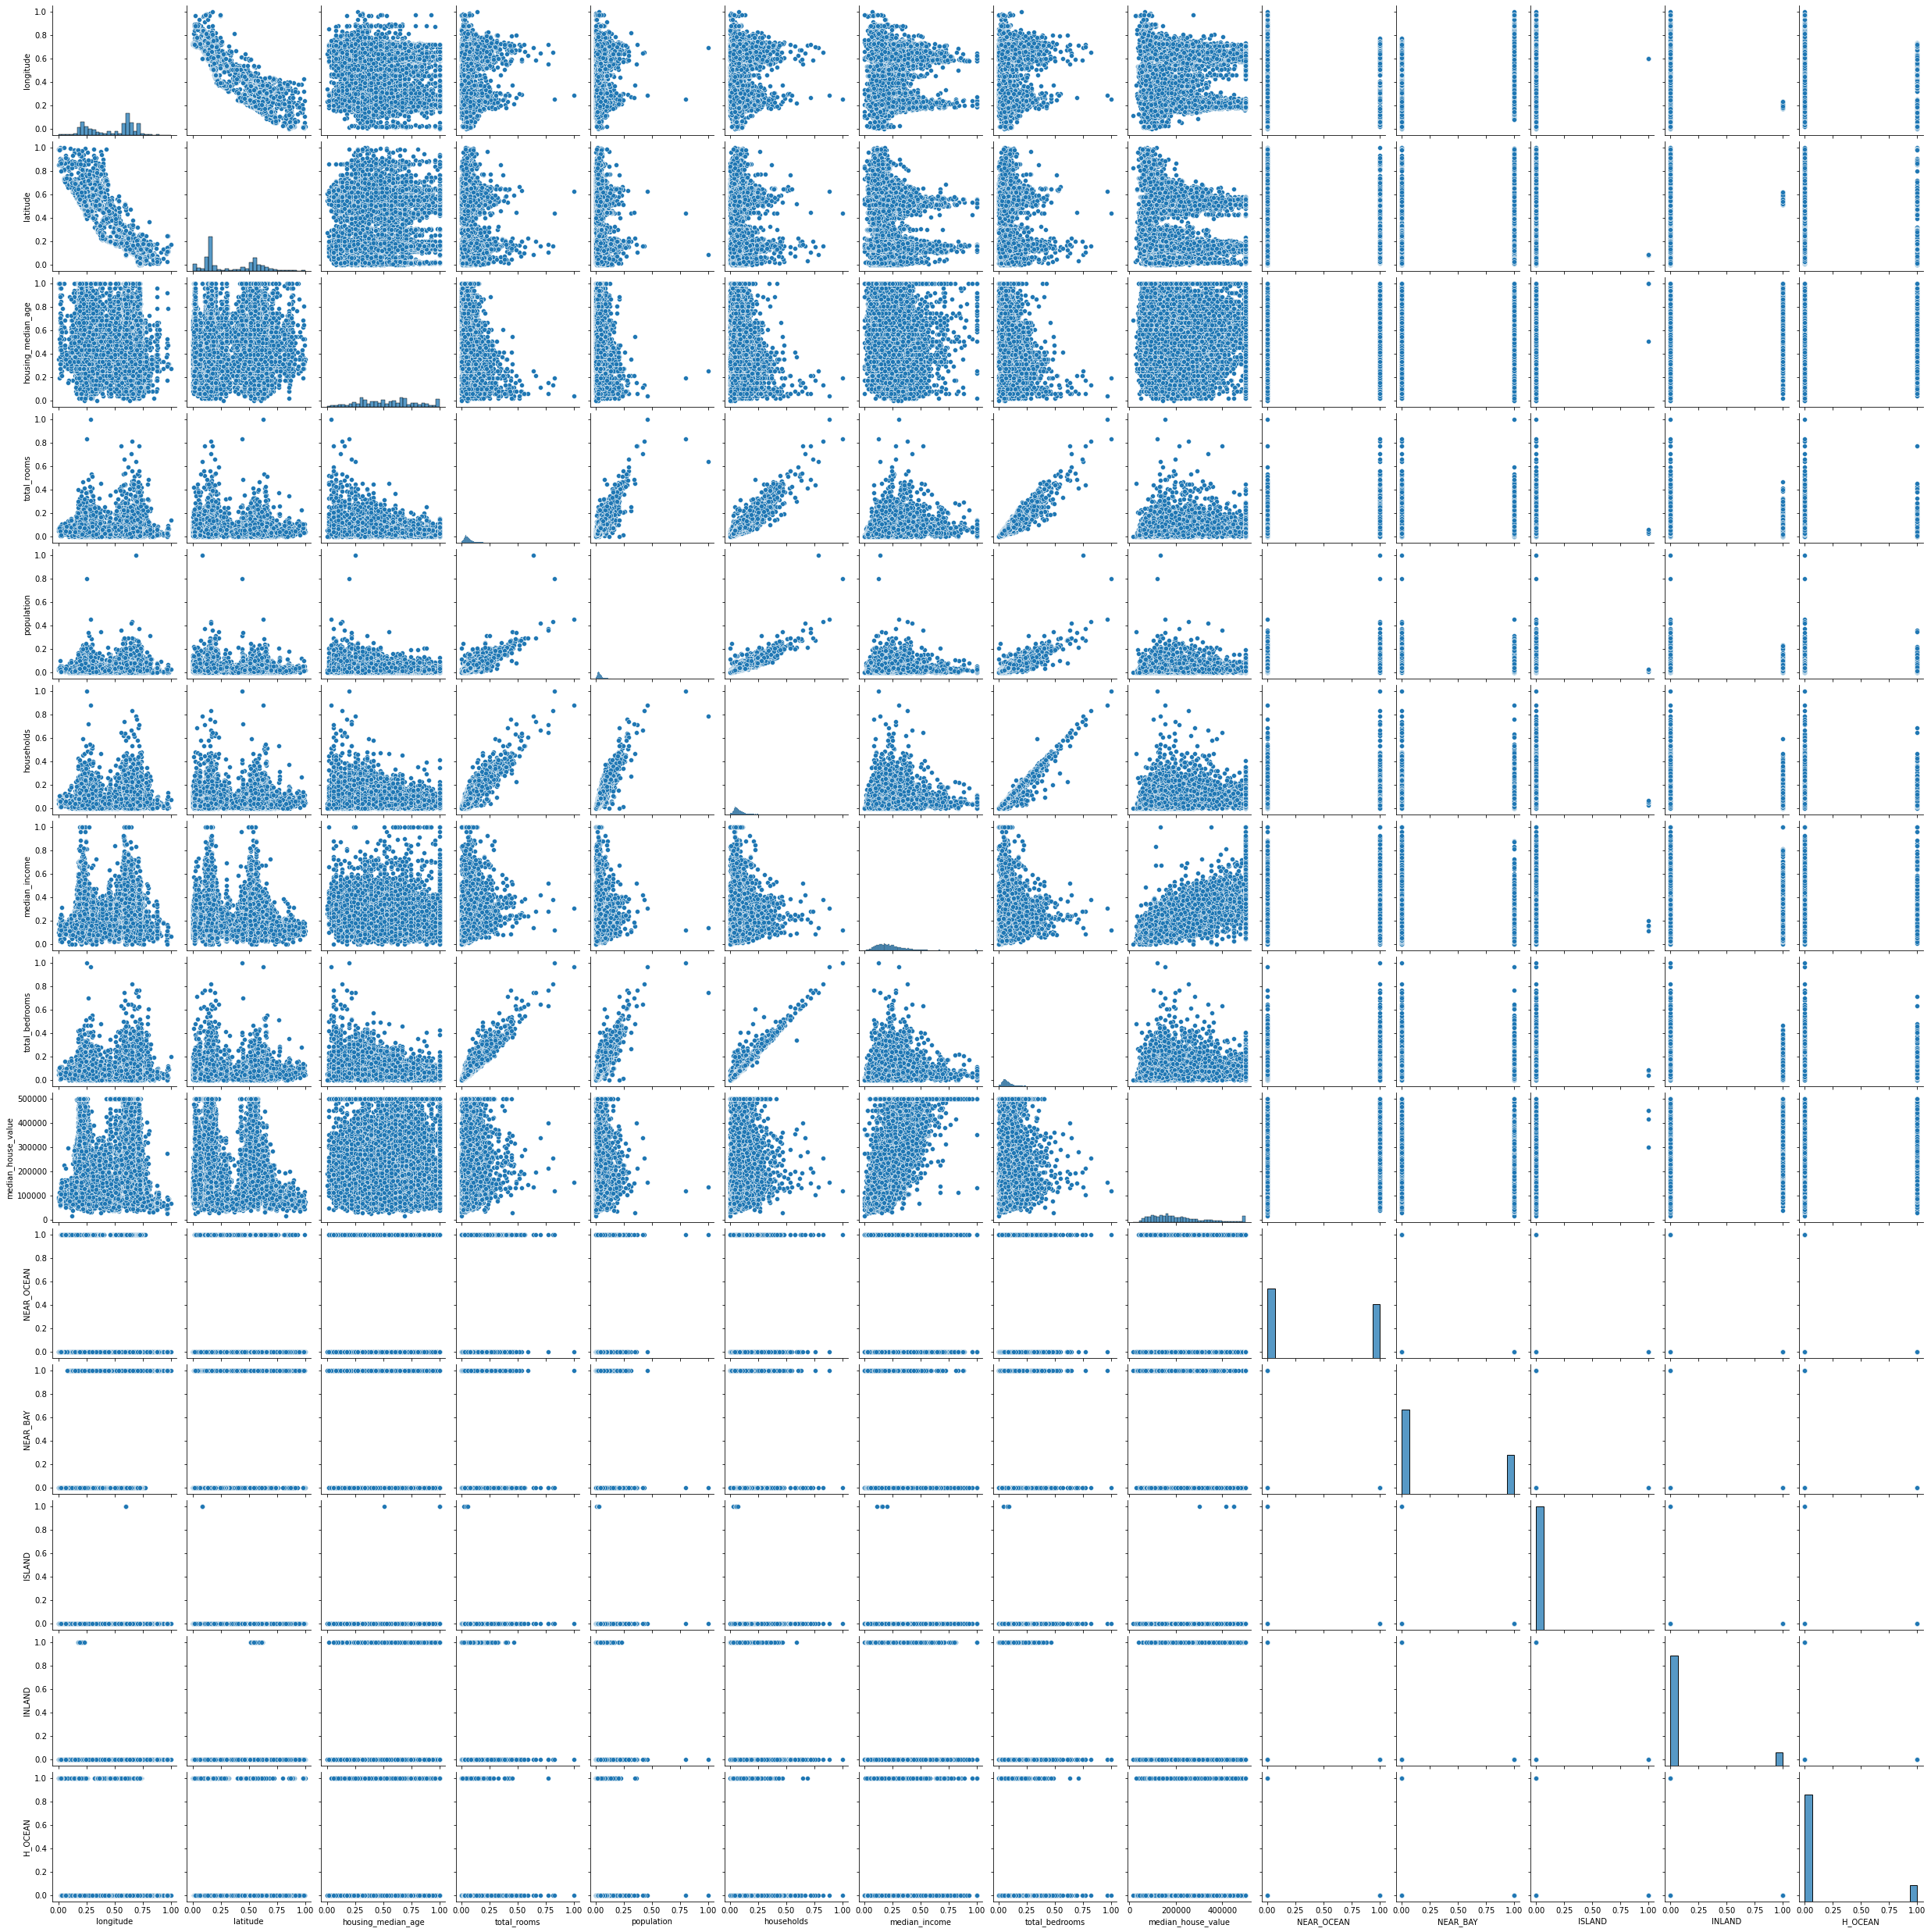

In [353]:
sns.pairplot(data=immoSV_train)

In [354]:
registerData(immoSV_train,'train',5)
registerData(immoSV_test,'test',5)

.\data\5it\5_immoSV_train.csv
.\data\5it\5_immoSV_test.csv


## 6e itération : feature permutation

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
immoSV_train = pd.read_csv(r'.\data\5it\5_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\5it\5_immoSV_test.csv',delimiter=',', decimal='.')

In [120]:
y_train = immoSV_train["median_house_value"]
X_train = immoSV_train.drop(["median_house_value","ocean_proximity"], axis=1)
y_test = immoSV_test["median_house_value"]
X_test = immoSV_test.drop(["median_house_value","ocean_proximity"], axis=1)

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Perform Permutation
permutation_score = permutation_importance(model, X_test, y_test,random_state=3,n_repeats=100) 
# Unstack results
importance_df = pd.DataFrame(np.vstack((X_test.columns,permutation_score.importances_mean)).T) 
importance_df.columns=['feature','feature importance']
# Order by importance
importance_df.sort_values(by="feature importance", ascending = False) 

feature feature importance
6        median_income           0.825434
0            longitude           0.457535
1             latitude           0.448291
4           population           0.267773
7       total_bedrooms           0.239318
9             NEAR_BAY            0.13353
5           households           0.057841
3          total_rooms           0.033909
8           NEAR_OCEAN           0.029679
2   housing_median_age           0.028571
11              INLAND           0.012926
12             H_OCEAN           0.008792
10              ISLAND                0.0

In [104]:
model = LinearRegression()
model.fit(X_train[['median_income']], y_train)
print(model.score(X_test[['median_income']], y_test))
model.fit(X_train[['median_income','longitude']], y_train)
print(model.score(X_test[['median_income','longitude']], y_test))
model.fit(X_train[['median_income','longitude','latitude']], y_train)
print(model.score(X_test[['median_income','longitude','latitude']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age','INLAND']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age','INLAND']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age','INLAND','H_OCEAN']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age','INLAND','H_OCEAN']], y_test))
model.fit(X_train[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age','INLAND','H_OCEAN','ISLAND']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','total_bedrooms','NEAR_BAY','households','total_rooms','NEAR_OCEAN','housing_median_age','INLAND','H_OCEAN','ISLAND']], y_test))

0.477975891410913
0.479326816332447
0.5816767086417741
0.5834002197141003
0.616272135029286
0.6281623240154426
0.6300686501145699
0.6313420255012766
0.6315818718571504
0.6438238944188024
0.6438587925836633
0.6438691817226356
0.644089706853018


On enleve les variables INLAND, H_OCEAN, ISLAND car il n'apportent rien à notre score. 

In [121]:
X_train = X_train.drop(['INLAND', 'H_OCEAN', 'ISLAND'],axis=1)

In [111]:
vif_df = pd.DataFrame()
vif_df["vif_index"] = [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df["features"] = X_train.columns
vif_df

vif_index            features
0  12.377935           longitude
1   6.613871            latitude
2   6.757924  housing_median_age
3  31.617177         total_rooms
4  14.911315          population
5  85.656981          households
6   6.729371       median_income
7  89.389646      total_bedrooms
8   3.365762          NEAR_OCEAN
9   3.880047            NEAR_BAY

Longitude, total_rooms, population,households,total_bedrooms montrent de la colinéarité.

In [118]:
model = LinearRegression()
model.fit(X_train[['longitude','population','total_bedrooms','households','total_rooms']], y_train)
print(model.score(X_test[['longitude','population','total_bedrooms','households','total_rooms']], y_test))
#total_rooms
model.fit(X_train[['longitude','population','total_bedrooms','households']], y_train)
print(model.score(X_test[['longitude','population','total_bedrooms','households']], y_test))
#households
model.fit(X_train[['longitude','population','total_bedrooms','total_rooms']], y_train)
print(model.score(X_test[['longitude','population','total_bedrooms','total_rooms']], y_test))
#total_berooms
model.fit(X_train[['longitude','population','households','total_rooms']], y_train)
print(model.score(X_test[['longitude','population','households','total_rooms']], y_test))
#population
model.fit(X_train[['longitude','total_bedrooms','households','total_rooms']], y_train)
print(model.score(X_test[['longitude','total_bedrooms','households','total_rooms']], y_test))
#longitude
model.fit(X_train[['population','total_bedrooms','households','total_rooms']], y_train)
print(model.score(X_test[['population','total_bedrooms','households','total_rooms']], y_test))

0.1389700766935218
0.055622377610640705
0.10100233866193864
0.09130862030871234
0.06713872062215709
0.13917159848397764


On garde quand même longitude car indépendant à latitude, et on garde total_rooms et population. On rejete total_bedrooms et households.

In [122]:
model.fit(X_train[['median_income','longitude','latitude','population','NEAR_BAY','total_rooms','NEAR_OCEAN','housing_median_age']], y_train)
print(model.score(X_test[['median_income','longitude','latitude','population','NEAR_BAY','total_rooms','NEAR_OCEAN','housing_median_age']], y_test))

0.6212541615977606


## 6e itération : Kmeans

In [49]:
immoSV_train = pd.read_csv(r'.\data\5it\5_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\5it\5_immoSV_test.csv',delimiter=',', decimal='.')

##### Standardisation des données

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss_X_train = immoSV_train.drop(['ocean_proximity','median_house_value'], axis=1)
ss_X_test = immoSV_test.drop(['ocean_proximity','median_house_value'], axis=1)

In [52]:
ss = StandardScaler()
ft_ss = ss.fit(ss_X_train)
ss_immoSV_train = ft_ss.transform(ss_X_train)

In [53]:
ss_immoSV_test = ft_ss.transform(ss_X_test)

In [129]:
immoSV_train = pd.DataFrame(ss_X_train)
immoSV_test = pd.DataFrame(ss_X_test)

In [130]:
registerData(immoSV_train,'train',6)
registerData(immoSV_test,'test',6)

.\data\6it\6_immoSV_train.csv
.\data\6it\6_immoSV_test.csv


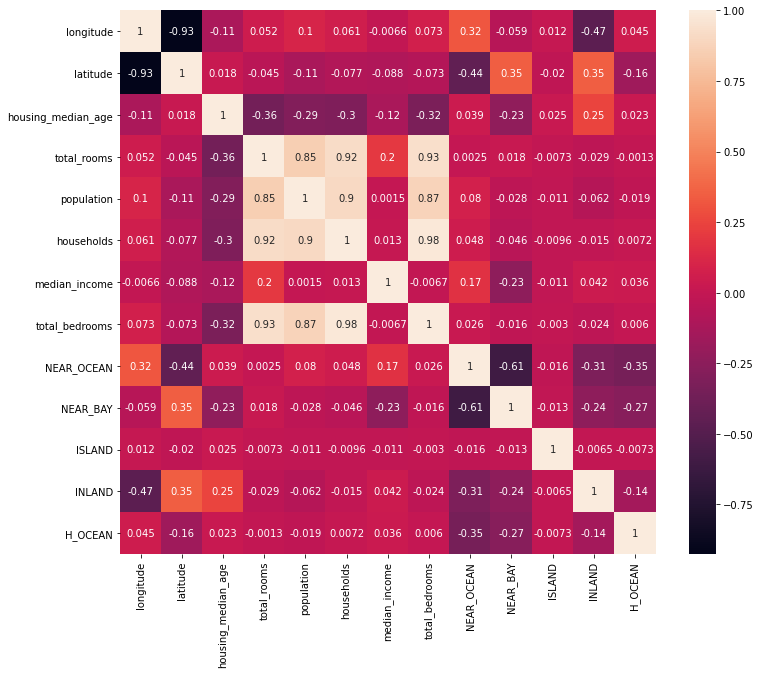

In [54]:
corr_ss_immoSV_train = pd.DataFrame(ss_immoSV_train, columns=ss_X_train.columns).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_ss_immoSV_train, annot=True)
plt.show()

Il y a de fortes corrélations entre les variables (>0.8 ou <-0.8). Je vais garder total_rooms de population-total_rooms-total_bedrooms-households et latitude de latitude-longitude (qui sont les moins corrélés aux autres variables).

In [55]:
ss_X_train = ss_X_train.drop(['population','total_bedrooms','households', 'longitude'],axis=1)
ss_X_test = ss_X_test.drop(['population','total_bedrooms','households', 'longitude'],axis=1)

In [56]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ss_X_train)
    distortions.append(kmeanModel.inertia_)

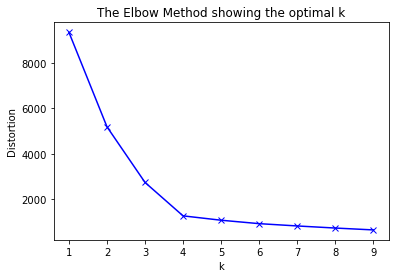

In [57]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Il y a un coude à 4. On va identifier 4 clusters.

In [58]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(ss_X_train)

KMeans(n_clusters=4)

In [59]:
score_silhouette = silhouette_score(ss_X_train, kmeanModel.labels_, metric='euclidean')
score_silhouette

0.7181126642494446

In [60]:
ss_X_train['k_means']=kmeanModel.predict(ss_X_train)
ss_X_train

latitude  housing_median_age  total_rooms  median_income  NEAR_OCEAN  \
0      0.172708            0.607843     0.062150       0.246652         1.0   
1      0.641791            0.294118     0.057647       0.314637         0.0   
2      0.167377            0.607843     0.141600       1.000000         1.0   
3      0.147122            0.176471     0.067187       0.149267         0.0   
4      0.549041            0.686275     0.028137       0.226300         0.0   
...         ...                 ...          ...            ...         ...   
11553  0.186567            0.411765     0.082782       0.381850         1.0   
11554  0.457356            0.313725     0.057520       0.438932         0.0   
11555  0.652452            0.529412     0.085962       0.256472         0.0   
11556  0.560768            1.000000     0.080391       0.248603         0.0   
11557  0.541578            0.607843     0.075099       0.258403         0.0   

       NEAR_BAY  ISLAND  INLAND  H_OCEAN  k_means  
0           0.0     0.0     0.0      0.0        1  
1           1.0     0.0     0.0      0.0        2  
2           0.0     0.0     0.0      0.0        1  
3           1.0     0.0     0.0      0.0        2  
4           0.0     0.0     1.0      0.0        3  
...         ...     ...     ...      ...      ...  
11553       0.0     0.0     0.0      0.0        1  
11554       1.0     0.0     0.0      0.0        2  
11555       1.0     0.0     0.0      0.0        2  
11556       0.0     0.0     1.0      0.0        3  
11557       0.0     0.0     1.0      0.0        3  

[11558 rows x 10 columns]

In [61]:
ss_X_test['k_means']=kmeanModel.predict(ss_X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

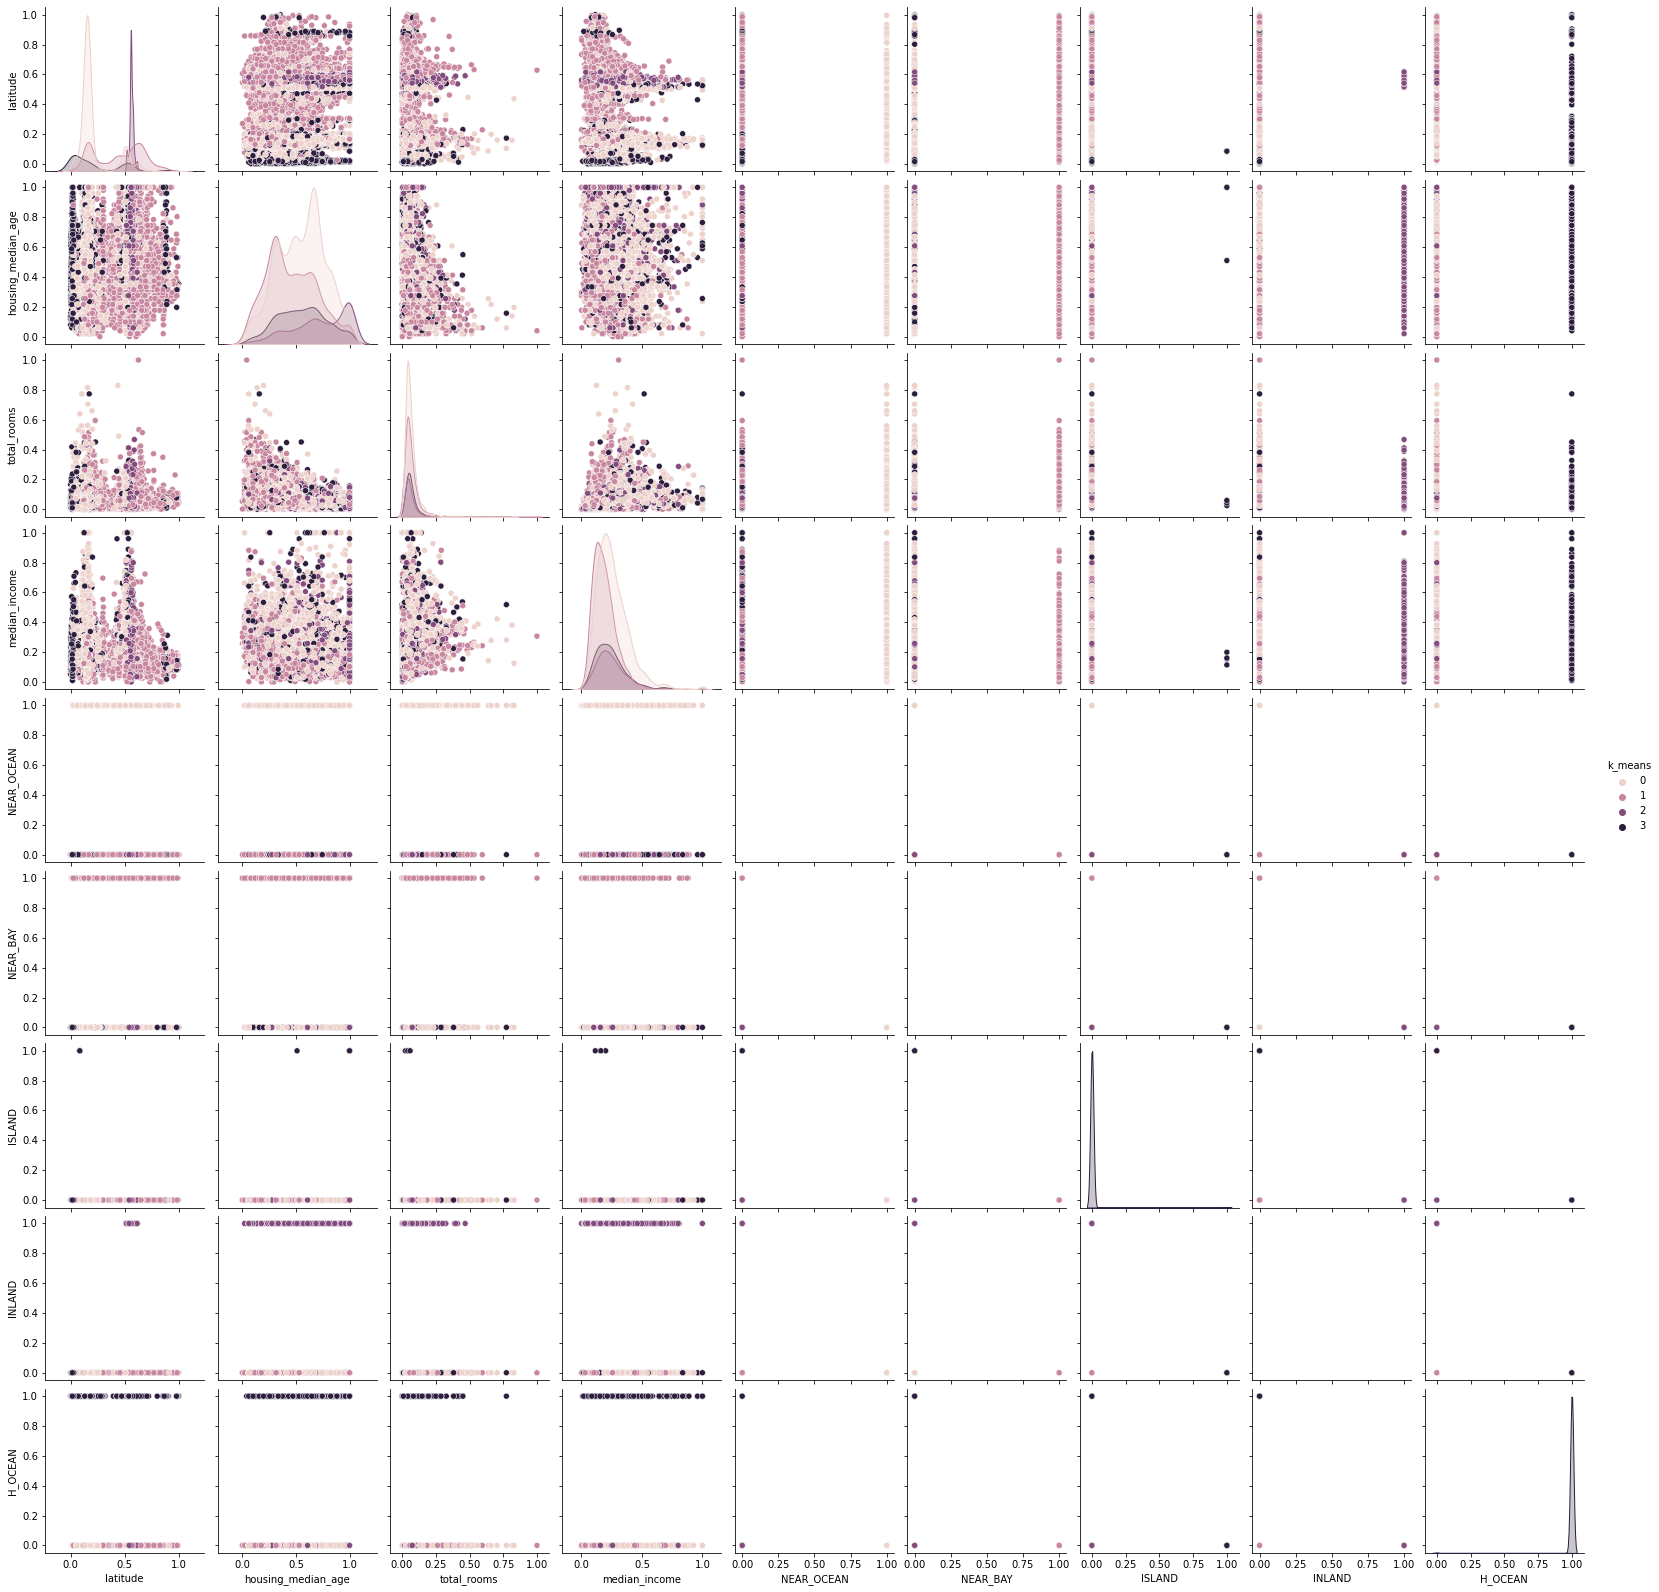

In [392]:
sns.pairplot(ss_X_train,hue='k_means')

Les groupes correspondent aux localisations des districts : 
- groupe 0 : near ocean
- groupe 1 : near bay
- groupe 2 : inland
- groupe 3 : <1H

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_means', ylabel='NEAR_BAY'>

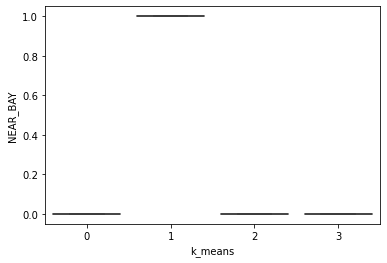

In [401]:
sns.boxplot(ss_X_train['k_means'],ss_X_train['NEAR_BAY'])

In [62]:
ss_X_train = ss_X_train.merge(immoSV_train['median_house_value'],how='inner', on=ss_X_train.index)
ss_X_train = ss_X_train.drop('key_0', axis=1)
ss_X_test = ss_X_test.merge(immoSV_test['median_house_value'],how='inner', on=ss_X_test.index)
ss_X_test = ss_X_test.drop('key_0', axis=1)

In [63]:
ss_X_test

latitude  housing_median_age  total_rooms  median_income  NEAR_OCEAN  \
0     0.150320            0.647059     0.058690       0.409098         1.0   
1     0.583156            0.411765     0.038516       0.133398         0.0   
2     0.421109            0.529412     0.025287       0.101537         1.0   
3     0.029851            0.294118     0.045156       0.457228         1.0   
4     0.515991            0.372549     0.075404       0.300865         0.0   
...        ...                 ...          ...            ...         ...   
4949  0.153518            0.568627     0.043833       0.127205         1.0   
4950  0.167377            0.705882     0.058970       0.533344         1.0   
4951  0.154584            0.333333     0.205149       0.202970         1.0   
4952  0.528785            0.313725     0.010049       0.184115         0.0   
4953  0.703625            0.745098     0.035794       0.172418         1.0   

      NEAR_BAY  ISLAND  INLAND  H_OCEAN  k_means  median_house_value  
0          0.0     0.0     0.0      0.0        1            452300.0  
1          1.0     0.0     0.0      0.0        2            125000.0  
2          0.0     0.0     0.0      0.0        1            210700.0  
3          0.0     0.0     0.0      0.0        1            278600.0  
4          0.0     0.0     1.0      0.0        3            262500.0  
...        ...     ...     ...      ...      ...                 ...  
4949       0.0     0.0     0.0      0.0        1            156100.0  
4950       0.0     0.0     0.0      0.0        1            430200.0  
4951       0.0     0.0     0.0      0.0        1            171900.0  
4952       0.0     0.0     1.0      0.0        3            156300.0  
4953       0.0     0.0     0.0      0.0        1            114600.0  

[4954 rows x 11 columns]

In [64]:
X_train = ss_X_train.drop('median_house_value',axis=1)

In [65]:
X_test = ss_X_test.drop('median_house_value',axis=1)

In [66]:
model = LinearRegression()
model.fit(X_train[X_train['k_means']==0], ss_X_train['median_house_value'][ss_X_train['k_means']==0])
model.score(X_test[X_test['k_means']==0], ss_X_test['median_house_value'][ss_X_test['k_means']==0])

0.5181485084767024

In [67]:
model.fit(X_train[X_train['k_means']==1], ss_X_train['median_house_value'][ss_X_train['k_means']==1])
model.score(X_test[X_test['k_means']==1], ss_X_test['median_house_value'][ss_X_test['k_means']==1])

0.48291418564128497

In [68]:
model.fit(X_train[X_train['k_means']==2], ss_X_train['median_house_value'][ss_X_train['k_means']==2])
model.score(X_test[X_test['k_means']==2], ss_X_test['median_house_value'][ss_X_test['k_means']==2])

0.4839561244194618

In [69]:
model.fit(X_train[X_train['k_means']==3], ss_X_train['median_house_value'][ss_X_train['k_means']==3])
model.score(X_test[X_test['k_means']==3], ss_X_test['median_house_value'][ss_X_test['k_means']==3])

0.45547527022290646

##### Robust standardisation

In [70]:
immoSV_train = pd.read_csv(r'.\data\5it\5_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\5it\5_immoSV_test.csv',delimiter=',', decimal='.')

In [71]:
rs_X_train = immoSV_train.drop(['ocean_proximity','median_house_value'], axis=1)
rs_X_test = immoSV_test.drop(['ocean_proximity','median_house_value'], axis=1)

In [72]:
from sklearn.preprocessing import RobustScaler

In [73]:
rs = RobustScaler()
ft_rs = rs.fit(rs_X_train)
rs_immoSV_train = ft_rs .transform(rs_X_train)

In [74]:
rs_X_train = rs_X_train.drop(['population','total_bedrooms','households', 'longitude'],axis=1)

In [75]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(rs_X_train)
    distortions.append(kmeanModel.inertia_)

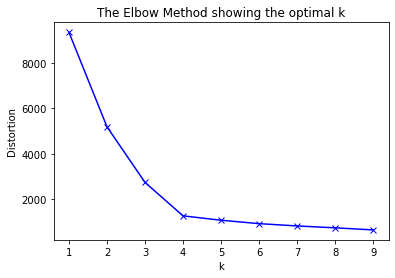

In [76]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [77]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(rs_X_train)

KMeans(n_clusters=4)

In [78]:
score_silhouette = silhouette_score(rs_X_train, kmeanModel.labels_, metric='euclidean')
score_silhouette

0.7181126642494446

In [79]:
rs_X_train['k_means']=kmeanModel.predict(rs_X_train)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

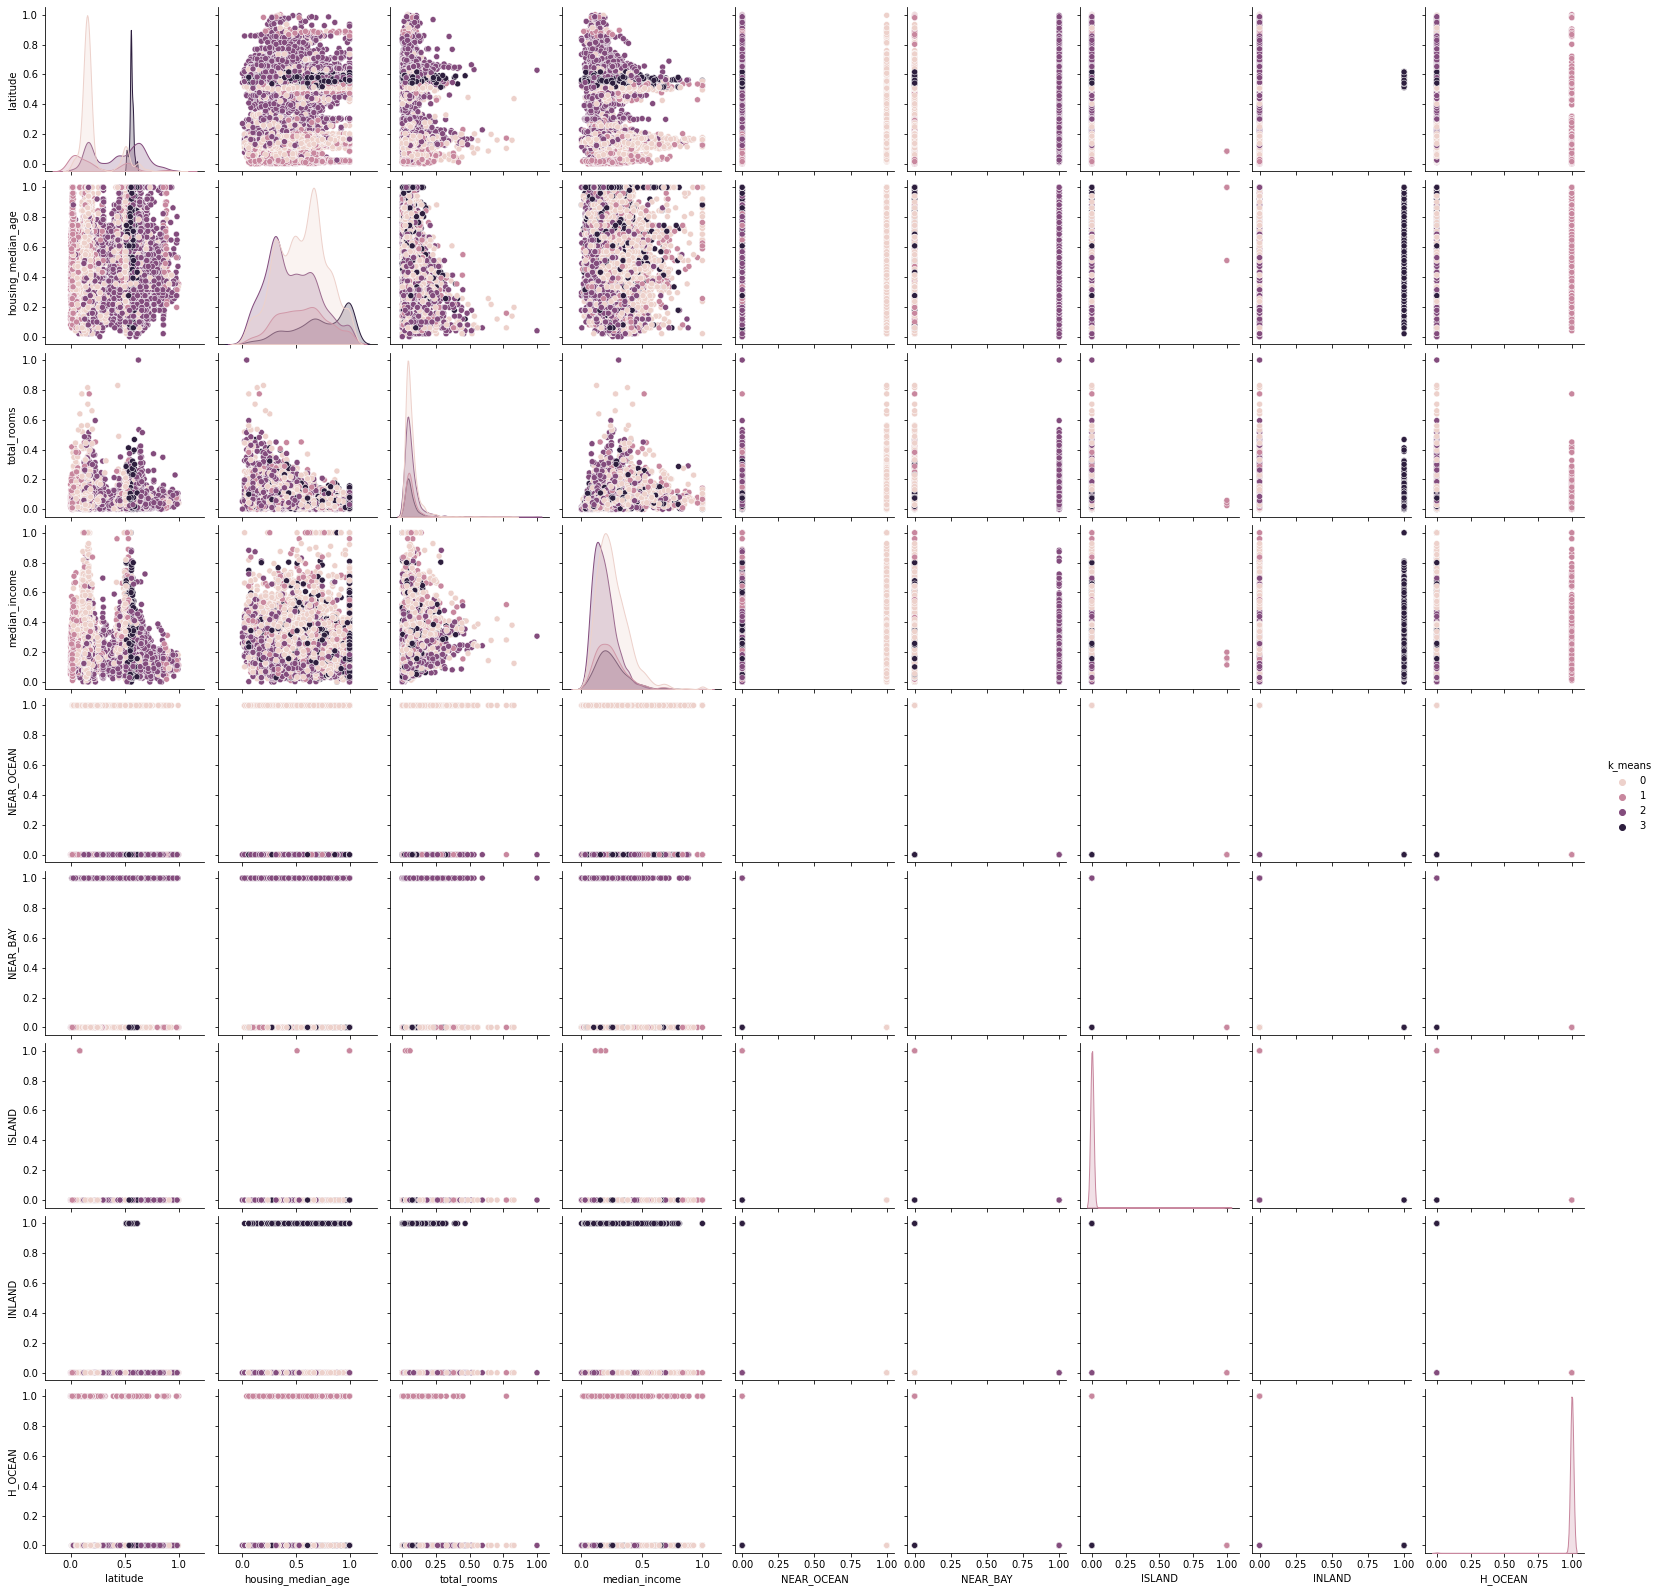

In [80]:
sns.pairplot(rs_X_train,hue='k_means')

## itération : ACP

In [124]:
from sklearn.decomposition import PCA

In [131]:
immoSV_train = pd.read_csv(r'.\data\5it\5_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\5it\5_immoSV_test.csv',delimiter=',', decimal='.')

In [134]:
immoSV_train = immoSV_train.drop('ocean_proximity', axis=1)

In [153]:
X = immoSV_train.drop('median_house_value', axis=1)
Y = immoSV_train['median_house_value']

In [156]:
#instanciation
acp = PCA(svd_solver='full')
ft_acp = acp.fit(X)
#calculs
coord_immoSV_train = ft_acp.transform(X)

In [157]:
p = acp.n_components_
n = len(X)
eigval = (n-1)/n*acp.explained_variance_

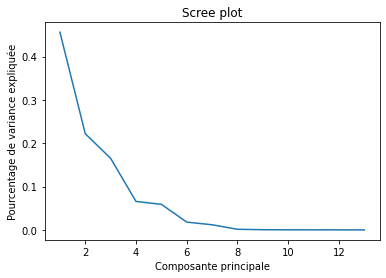

In [158]:
#scree plot

plt.plot(np.arange(1,p+1),acp.explained_variance_ratio_)
plt.title("Scree plot")
plt.ylabel("Pourcentage de variance expliquée")
plt.xlabel("Composante principale")
plt.show()

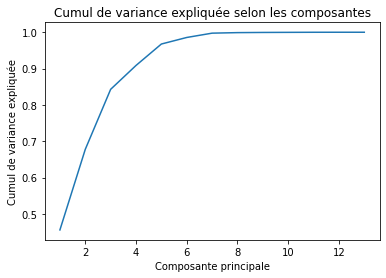

In [159]:
#cumul de variance expliquée

plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Cumul de variance expliquée selon les composantes")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Composante principale")
plt.show()

In [160]:
np.cumsum(acp.explained_variance_ratio_)

array([0.45598153, 0.6777742 , 0.84290767, 0.9085862 , 0.96757521,
       0.98560494, 0.99748133, 0.99894711, 0.99944965, 0.99969854,
       0.99992694, 1.        , 1.        ])

In [161]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * np.sqrt(eigval)[k]

#on affiche pour les deux premiers axes
pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]})

id     COR_1     COR_2     COR_3
0            longitude -0.065063 -0.069158  0.113669
1             latitude  0.121973  0.028627 -0.124100
2   housing_median_age -0.033230  0.079077 -0.064113
3          total_rooms  0.000311 -0.003640  0.004324
4           population -0.002278 -0.002934  0.002797
5           households -0.003327 -0.002285  0.004353
6        median_income -0.028822  0.011665 -0.000369
7       total_bedrooms -0.001635 -0.003331  0.005239
8           NEAR_OCEAN -0.462902 -0.168645 -0.036925
9             NEAR_BAY  0.391997 -0.249113  0.014224
10              ISLAND  0.000021  0.000205  0.000064
11              INLAND  0.042022  0.189087 -0.220514
12             H_OCEAN  0.028862  0.228466  0.243150

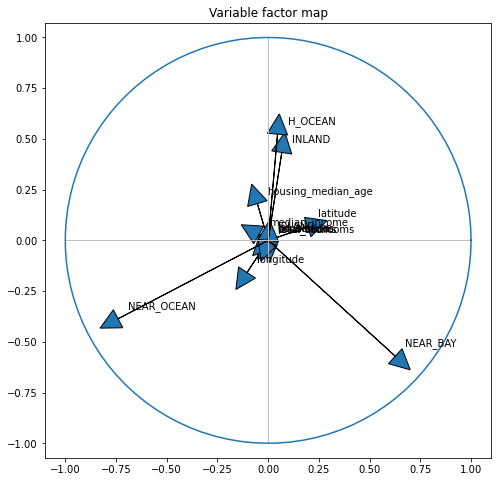

In [162]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, acp.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             acp.components_[0, i],  #0 for PC1
             acp.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(acp.components_[0, i] + 0.05,
             acp.components_[1, i] + 0.05,
             X.columns.values[i])

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')



plt.show()

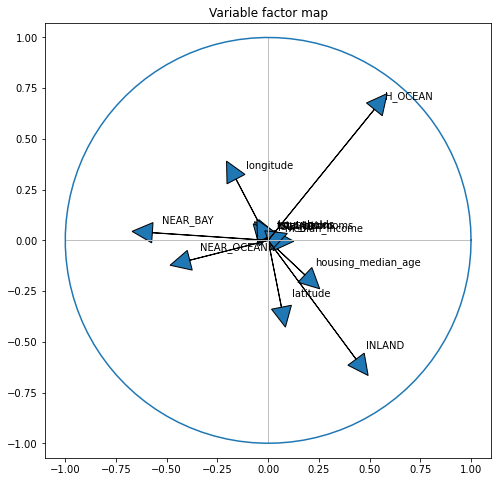

In [163]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, acp.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             acp.components_[1, i],  #0 for PC1
             acp.components_[2, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(acp.components_[1, i] + 0.05,
             acp.components_[2, i] + 0.05,
             X.columns.values[i])

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')



plt.show()

In [167]:
X_test = immoSV_test.drop(['median_house_value','ocean_proximity'], axis=1)
X_test = ft_acp.transform(X_test)

In [168]:
model = LinearRegression()
model.fit(coord_immoSV_train, Y)
model.score(X_test, y_test)

0.6438691817226357

## itération : KNN Regression

In [179]:
immoSV_train = pd.read_csv(r'.\data\5it\5_immoSV_train.csv',delimiter=',', decimal='.')
immoSV_test = pd.read_csv(r'.\data\5it\5_immoSV_test.csv',delimiter=',', decimal='.')

In [181]:
immoSV_train

longitude  latitude  housing_median_age  total_rooms  population  \
0       0.596614  0.172708            0.607843     0.062150    0.027581   
1       0.298805  0.641791            0.294118     0.057647    0.033579   
2       0.592629  0.167377            0.607843     0.141600    0.043782   
3       0.743028  0.147122            0.176471     0.067187    0.054993   
4       0.218127  0.549041            0.686275     0.028137    0.017378   
...          ...       ...                 ...          ...         ...   
11553   0.560757  0.186567            0.411765     0.082782    0.044567   
11554   0.449203  0.457356            0.313725     0.057520    0.019480   
11555   0.303785  0.652452            0.529412     0.085962    0.043193   
11556   0.191235  0.560768            1.000000     0.080391    0.035149   
11557   0.231076  0.541578            0.607843     0.075099    0.041119   

       households  median_income  total_bedrooms  median_house_value  \
0        0.080605       0.246652        0.085843            325000.0   
1        0.060536       0.314637        0.056970            132400.0   
2        0.114164       1.000000        0.116423            500001.0   
3        0.097878       0.149267        0.095933             81000.0   
4        0.037013       0.226300        0.033530            192200.0   
...           ...            ...             ...                 ...   
11553    0.080770       0.381850        0.081652            248000.0   
11554    0.042770       0.438932        0.045793            195900.0   
11555    0.090475       0.256472        0.084912            139200.0   
11556    0.132094       0.248603        0.131170            466700.0   
11557    0.086198       0.258403        0.084446            221200.0   

      ocean_proximity  NEAR_OCEAN  NEAR_BAY  ISLAND  INLAND  H_OCEAN  
0           <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
1              INLAND         0.0       1.0     0.0     0.0      0.0  
2           <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
3              INLAND         0.0       1.0     0.0     0.0      0.0  
4            NEAR BAY         0.0       0.0     0.0     1.0      0.0  
...               ...         ...       ...     ...     ...      ...  
11553       <1H OCEAN         1.0       0.0     0.0     0.0      0.0  
11554          INLAND         0.0       1.0     0.0     0.0      0.0  
11555          INLAND         0.0       1.0     0.0     0.0      0.0  
11556        NEAR BAY         0.0       0.0     0.0     1.0      0.0  
11557        NEAR BAY         0.0       0.0     0.0     1.0      0.0  

[11558 rows x 15 columns]

In [182]:
X_train = immoSV_train.drop(['ocean_proximity','median_house_value'], axis=1)
Y_train = immoSV_train['median_house_value']
X_test = immoSV_test.drop(['ocean_proximity','median_house_value'], axis=1)
Y_test  = immoSV_test['median_house_value']

In [187]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.6953616205596491

# Critique du modele retenue (underfitting, etc.)